In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Retrieve Data

### Attempt 1: Web Scraper

We first attempted to use a website scraper to retrieve data from Etherscan. We learnt how to write a website scraper and implemented it for our use. 

In [ ]:
import csv
import sys
import datetime
import requests
from time import sleep
from bs4 import BeautifulSoup

def scraper(num_pages=4, req_delay=0.1):
  timestamp = datetime.datetime.now().strftime ("%Y%m%d_%H%M%S")
  
  print("%d pages to parse with delay of %f seconds between each page" % (num_pages, req_delay))
  api_url = "https://etherscan.io/contractsVerified/"
  
  with open('ExchangeAccounts-'+timestamp+'.csv', 'w') as csvfile:
    fieldnames = ['addr', 'name_tag', 'balance', 'tx_count']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for i in range(0, num_pages):
      url = api_url + str('?subcatid=undefined&size=100&start=') + str(i*100) + str('&col=1&order=asc')
      sleep(req_delay)
      response = requests.get(url)
      print("URL: %s, Status: %s" % (url, response.status_code))

      content = response.content
      soup = BeautifulSoup(content, 'html.parser')

      for row in soup.select('table.table-hover tbody tr'):
        cells = row.findAll('td')
        cells = map(lambda x: x.text, cells)
        addr, name_tag, balance, tx_count = cells
        writer.writerow({
          'addr': addr,
          'name_tag': name_tag,
          'balance': balance,
          'tx_count': tx_count,
        })

def main():
  if len(sys.argv) > 2:
    scraper(int(sys.argv[1]), float(sys.argv[2]))
  elif len(sys.argv) == 2:
    scraper(int(sys.argv[1]))
  else:
    scraper()

if __name__ == "__main__":
  main()

ValueError: invalid literal for int() with base 10: '-f'

This scraper we wrote works for non-password protected websites. However, some websites we are getting our data from are password protected, and would require more work on our scraper, which we have just learnt and are not as familiar with. 

Thus, we changed our method of retrieving data to retrieving through APIs. 

### Attempt 2: APIs

In [ ]:
API_KEY = "H7Y6I5GQ2RN5PJ8VSAYFNEX2HQDGMPWWIZ"

In [ ]:
wallets = pd.read_csv('./wallets.csv')
wallets.head()

,Unnamed: 0,Unnamed: 0.1,WID,Label,Eth Balance,Txn Count,Exchange
0,0.0,0.0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y
1,1.0,1.0,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y
2,2.0,2.0,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y
3,3.0,3.0,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y
4,4.0,4.0,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y


In [ ]:
walletDF = pd.DataFrame(wallets)
walletDF

,Unnamed: 0,Unnamed: 0.1,WID,Label,Eth Balance,Txn Count,Exchange
0,0.0,0.0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y
1,1.0,1.0,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y
2,2.0,2.0,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y
3,3.0,3.0,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y
4,4.0,4.0,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y
...,...,...,...,...,...,...,...
840,840.0,840.0,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.19797278988686695,214,N
841,841.0,841.0,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858954751790848,28,N
842,842.0,842.0,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172274221117,22,N
843,843.0,843.0,0xffcdfbd4acc3ed701a12e897774b1e5dfe296803,NaN,0.0,9,N


In [ ]:
import time
count = 0
for index, row in walletDF.iterrows():
    if row['Eth Balance'] == 'yeet':
        count += 1
        baseURL = "https://api.etherscan.io/api?module=account&action=balance&address=" + row["WID"] + "&tag=latest&apikey=" + API_KEY
        response = requests.get(baseURL)
        balance = int (response.json()['result']) / 10**18
        row['Eth Balance'] = balance
        if count == 5:
            time.sleep(2)
            count = 0

walletDF

,Unnamed: 0,Unnamed: 0.1,WID,Label,Eth Balance,Txn Count,Exchange
0,0.0,0.0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y
1,1.0,1.0,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y
2,2.0,2.0,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y
3,3.0,3.0,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y
4,4.0,4.0,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y
...,...,...,...,...,...,...,...
840,840.0,840.0,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.19797278988686695,214,N
841,841.0,841.0,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858954751790848,28,N
842,842.0,842.0,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172274221117,22,N
843,843.0,843.0,0xffcdfbd4acc3ed701a12e897774b1e5dfe296803,NaN,0.0,9,N


In [ ]:
walletDF.to_csv('test.csv')

In [ ]:
newData = pd.read_csv('test.csv')
newDF = pd.DataFrame(newData)
count = 0
for index, row in newDF.iterrows():
    if pd.isna(row['Txn Count']):
        count += 1
        baseURL = "https://api.etherscan.io/api?module=account&action=txlist&address=" + str(row["WID"]) + "&startblock=0&endblock=99999999&sort=asc&apikey=" + API_KEY
        response = requests.get(baseURL)
        try:
            txnCount = len(response.json()['result'])
            row['Txn Count'] = txnCount
        
        except:
            print(row['WID'])
        if count == 5:
            time.sleep(2)
            count = 0

newDF

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,WID,Label,Eth Balance,Txn Count,Exchange
0,0,0.0,0.0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y
1,1,1.0,1.0,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y
2,2,2.0,2.0,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y
3,3,3.0,3.0,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y
4,4,4.0,4.0,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y
...,...,...,...,...,...,...,...,...
840,840,840.0,840.0,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.19797278988686695,214,N
841,841,841.0,841.0,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858954751790848,28,N
842,842,842.0,842.0,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172274221117,22,N
843,843,843.0,843.0,0xffcdfbd4acc3ed701a12e897774b1e5dfe296803,NaN,0.0,9,N


In [ ]:
wallet = '0xE107a20CE3836329a3C310E9A2DA812CFB177F72'
baseURL = "https://api.etherscan.io/api?module=account&action=txlist&address=" + wallet + "&startblock=0&endblock=99999999&sort=asc&apikey=" + API_KEY
response = requests.get(baseURL)
txnCount = response.json()['result']
print(len(txnCount))

362


In [ ]:
for index, row in newWalletDF.iterrows():
    if row['Txn Count'] == 'PLS WORK':
        
        wallet = row['WID']
        baseURL = "https://api.etherscan.io/api?module=account&action=txlist&address=" + wallet + "&startblock=0&endblock=99999999&sort=asc&apikey=" + API_KEY
        response = requests.get(baseURL)
        txnCount = response.json()['result']
        try:
            print(len(txnCount))
            newWalletDF.loc[index, 'Txn Count'] = len(txnCount)
        
        except:
            print("error with wallet:", wallet)

newWalletDF


NameError: name 'newWalletDF' is not defined

In [ ]:
# for index, row in newWalletDF.iterrows():
wallet = "0xdfd5293d8e347dfe59e90efd55b2956a1343963d"
baseURL = "https://api.etherscan.io/api?module=account&action=tokentx&address=" + wallet + "&startblock=0&endblock=99999999&sort=asc&apikey=" + API_KEY
response = requests.get(baseURL)
print(response.json()['result'])


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for index, row in walletDF.iterrows():
    if pd.isna(row['ERC 20 Txn']):
        txnIn = 0
        txnOut = 0
        wallet = row['WID']
        baseURL = "https://api.etherscan.io/api?module=account&action=tokentx&address=" + wallet + "&startblock=0&endblock=99999999&sort=asc&apikey=" + API_KEY
        response = requests.get(baseURL)
        try:
            for txn in response.json()['result']:
                if txn['to'] == wallet:
                    txnIn += 1
                if txn['from'] == wallet:
                    txnOut += 1
            
            walletDF.loc[index, 'ERC 20 Txn In'] = txnIn
            walletDF.loc[index, 'ERC 20 Txn Out'] = txnOut
            walletDF.loc[index, 'ERC 20 Txn'] = txnIn + txnOut
        except:
            print("ERROR", wallet)
walletDF

KeyError: 'ERC 20 Txn'

## Clean Data

### View current raw data

In [ ]:
# convert csv to pd
rawData = pd.read_csv('data.csv')
rawData.head()

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y,626.0,35.0,591.0,0.0,0.0,0.0


In [ ]:
# view all data columns
df_raw_all = pd.DataFrame(rawData)
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.70176396,924,N,419.0,215.0,204.0,NaN,NaN,NaN
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.19797279,214,N,23.0,14.0,9.0,NaN,NaN,NaN
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858954752,28,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.17227,22,N,104.0,104.0,0.0,0.0,0.0,0.0


In [ ]:
df_raw_all.dtypes

Unnamed: 0          int64
WID                object
Label              object
Eth Balance        object
Txn Count          object
Exchange           object
ERC 20 Txn        float64
ERC 20 Txn In     float64
ERC 20 Txn Out    float64
ERC721 Txn Out    float64
ERC721 Txn In     float64
ERC721 Txn        float64
dtype: object

We can see that Eth Balance has the word "Ether" trailing for some of the entries, while other entries do not. However, this causes Eth Balance to be of type object instead of float64. 

We see that Txn Count is also of object type instead of float64. 

We would fix these. 

#### Do away Ether

In [ ]:
# do away ether by splitting the string and taking the first item, which is the number, and drop "ether"
df_raw_all['Eth Balance'] = df_raw_all.apply(lambda row:row['Eth Balance'].split()[0], axis =1)
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614,522,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866,"58,568",Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497,5,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0,"59,516",Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0,709,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.70176396,924,N,419.0,215.0,204.0,NaN,NaN,NaN
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.19797279,214,N,23.0,14.0,9.0,NaN,NaN,NaN
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858954752,28,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.17227,22,N,104.0,104.0,0.0,0.0,0.0,0.0


#### Fix to float

In [ ]:
# remove all commas from the numbers
df_raw_all['Eth Balance'] = df_raw_all['Eth Balance'].str.replace(',','')
df_raw_all['Txn Count'] = df_raw_all['Txn Count'].str.replace(',','')

# fix object to float 
df_raw_all['Eth Balance'] = df_raw_all['Eth Balance'].astype(float, errors = 'raise')
df_raw_all['Txn Count'] = df_raw_all['Txn Count'].astype(float, errors = 'raise')
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,NaN,NaN,NaN
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,NaN,NaN,NaN
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0


In [ ]:
df_raw_all.dtypes

Unnamed: 0          int64
WID                object
Label              object
Eth Balance       float64
Txn Count         float64
Exchange           object
ERC 20 Txn        float64
ERC 20 Txn In     float64
ERC 20 Txn Out    float64
ERC721 Txn Out    float64
ERC721 Txn In     float64
ERC721 Txn        float64
dtype: object

All our prediction variables (Eth Balance, Txn Count, ERC 20 Txn, ERC 20 Txn In, ERC 20 Txn Out, ERC 721 Txn, ERC 721 Txn In, ERC 721 Txn Out) are now of type float64.

### Check for missing values

In [ ]:
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
count,844.000000,8.440000e+02,8.430000e+02,839.000000,839.000000,839.000000,677.000000,677.000000,677.000000
mean,421.500000,1.863105e+04,2.594112e+05,2648.027414,1302.276520,1345.750894,7.751846,22.618907,30.370753
std,243.786108,1.355134e+05,1.022071e+06,4159.124985,2391.390169,2561.442066,53.849372,123.496686,166.356029
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.750000,1.619519e-02,2.750000e+01,8.000000,5.000000,1.000000,0.000000,0.000000,0.000000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.000000,0.000000,0.000000,0.000000
75%,632.250000,3.115703e+01,1.866600e+04,4518.500000,1015.000000,909.000000,0.000000,3.000000,4.000000
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.000000,1178.000000,2183.000000,2591.000000


From the count, we can see that 1 row of Txn Count is missing, as well as 5 rows of the 3 ERC 20 columns, and 167 rows of the 3 ERC 721 columns. 

We will fill in these values with the median of the respective data. 

### Clean missing rows of columns

#### Fill in missing values with the median

In [ ]:
# To put the median value of each column into its missing rows:
df_raw_all.fillna(df_raw_all.median().round(1), inplace=True)
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000


In [ ]:
# view data stats
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,0.0,0.0,0.0
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,0.0,0.0,0.0
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0


All our prediction variables (Eth Balance, Txn Count, ERC 20 Txn, ERC 20 Txn In, ERC 20 Txn Out, ERC 721 Txn, ERC 721 Txn In, ERC 721 Txn Out) have no missing values. 

### New derived column

It may also be worthwhile to analyse the ratio between the "In" and "Out" transfers of token ERC 20. In crpyto, it shows the type of transactions done in the wallet, and may be a factor to determine what kind of wallet it is. 

In [ ]:
df_raw_all['Ratio Transfers'] = (df_raw_all['ERC 20 Txn In']/ df_raw_all['ERC 20 Txn Out']).round(2)
df_raw_all.head()

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0,0.61
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0,3.77
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0,0.50
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0,0.75
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0,0.06


In [ ]:
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000,759.00
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374,inf
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893,NaN
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000,1.00
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000,1.54
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000,14.81
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000,inf


We note that "Ratio Transfers" only have 759 rows instead of the full 844 rows. Some rows of the "Ratio Transfers" column are missing as there is 0 ERC 20 Txn In and 0 ERC 20 Txn Out. We shall treat it as ratio = 1 as the number of In and Out transfers are the same. 

In [ ]:
# To put the median value of each column into its missing rows:
df_raw_all['Ratio Transfers'] = df_raw_all['Ratio Transfers'].fillna(1)
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000,844.000000
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374,141.102500
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893,334.389803
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000,1.000000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000,1.340000
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000,8.942500
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000,1000.000000


We also want to change the value of inf to 1000 to be able to plot graphs for our EDA.

In [ ]:
df_raw_all['Ratio Transfers'] = df_raw_all['Ratio Transfers'].replace(float('inf'), 1000)
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000,844.000000
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374,141.102500
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893,334.389803
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000,1.000000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000,1.340000
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000,8.942500
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000,1000.000000


In [ ]:
# rename dataframe
df = pd.DataFrame(df_raw_all)
df

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0,0.61
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0,3.77
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0,0.50
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0,0.75
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,0.0,0.0,0.0,1.05
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,0.0,0.0,0.0,1.56
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0,1.00
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0,1000.00


However, we note that the proportion of of Y to N is 43.6:56.4, which is slightly skewed. We shall view this is more detail. 

### View Response Variable

Explore the response variable `Exchange`, the one we are predicting.

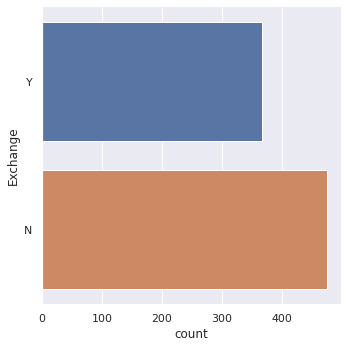

In [ ]:
sb.catplot(y = 'Exchange', data = df, kind = "count")

There is slightly more "N" than "Y", meaning that there is a slight class imbalance. This may lead to an imbalance in the False Positives and False Negatives in the confusion matrix, where False Negatives are higher in number than False Positives, as "N" was more likley in the data. 
Hence, we duplicate Y values to ensure equal "Y" and "N" data size for a fairer classification. 

### Upsample to balance the "Y" and "N" classes

In [ ]:
# Upsample "Y" to match "N"
from sklearn.utils import resample

Yes = df[df.Exchange == 'Y']
No = df[df.Exchange == 'N']
 
# Upsample the "Y" samples
Yes_Up = resample(Yes, 
                        replace=True,             # sample with replacement
                        n_samples=No.shape[0])    # to match number of N
 
# Combine the two classes back after upsampling
df_final = pd.concat([Yes_Up, No])
 
# Check the ratio of the classes
df_final['Exchange'].value_counts()

N    476
Y    476
Name: Exchange, dtype: int64

In [ ]:
# view the final data set
df_final

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
101,101,0x68b22215ff74e3606bd5e6c1de8c2d68180c85f7,BitMart 2,0.118737,911756.0,Y,10000.0,4849.0,5151.0,0.0,0.0,0.0,0.94
366,366,0x700f6912e5753e91ea3fae877a2374a2db1245d7,Yunbi 3,0.709658,7960.0,Y,18.0,17.0,1.0,0.0,0.0,0.0,17.00
354,354,0x1119aaefb02bf12b84d28a5d8ea48ec3c90ef1db,Trade.io,0.667908,17728.0,Y,10000.0,3618.0,6382.0,0.0,1.0,1.0,0.57
21,21,0xa30d8157911ef23c46c0eb71889efe6a648a41f7,BigONE,761.294150,117669.0,Y,10000.0,5441.0,4559.0,0.0,2.0,2.0,1.19
20,20,0xed5cdb0d02152046e6f234ad578613831b9184d4,Bidesk 3,0.003750,47129.0,Y,10000.0,2851.0,7149.0,0.0,0.0,0.0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,0.0,0.0,0.0,1.05
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,0.0,0.0,0.0,1.56
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0,1.00
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0,1000.00


The ratio of Y to N is now 50:50. We now have our final data set. 

In [ ]:
# check statistics of the data
df_final.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,952.000000,9.520000e+02,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,396.984244,1.998828e+04,2.747997e+05,2973.295168,1462.163866,1510.785714,5.534664,16.057773,21.592437,129.717321
std,242.594604,1.425891e+05,8.795297e+05,4324.282198,2472.720129,2655.930943,45.537228,104.536390,140.868083,319.684882
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193.000000,1.556027e-02,3.300000e+01,12.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,367.500000,3.794713e-01,5.330000e+02,175.000000,131.500000,17.000000,0.000000,0.000000,0.000000,1.355000
75%,605.250000,3.975674e+01,5.479800e+04,10000.000000,1809.000000,1509.750000,0.000000,1.000000,1.000000,11.525000
max,843.000000,2.003505e+06,1.113347e+07,10058.000000,10000.000000,9994.000000,1178.000000,2183.000000,2591.000000,1000.000000


## EDA

In [ ]:
finalData = pd.read_csv('data_final_w_ratio.csv')
df_final = pd.DataFrame(finalData)

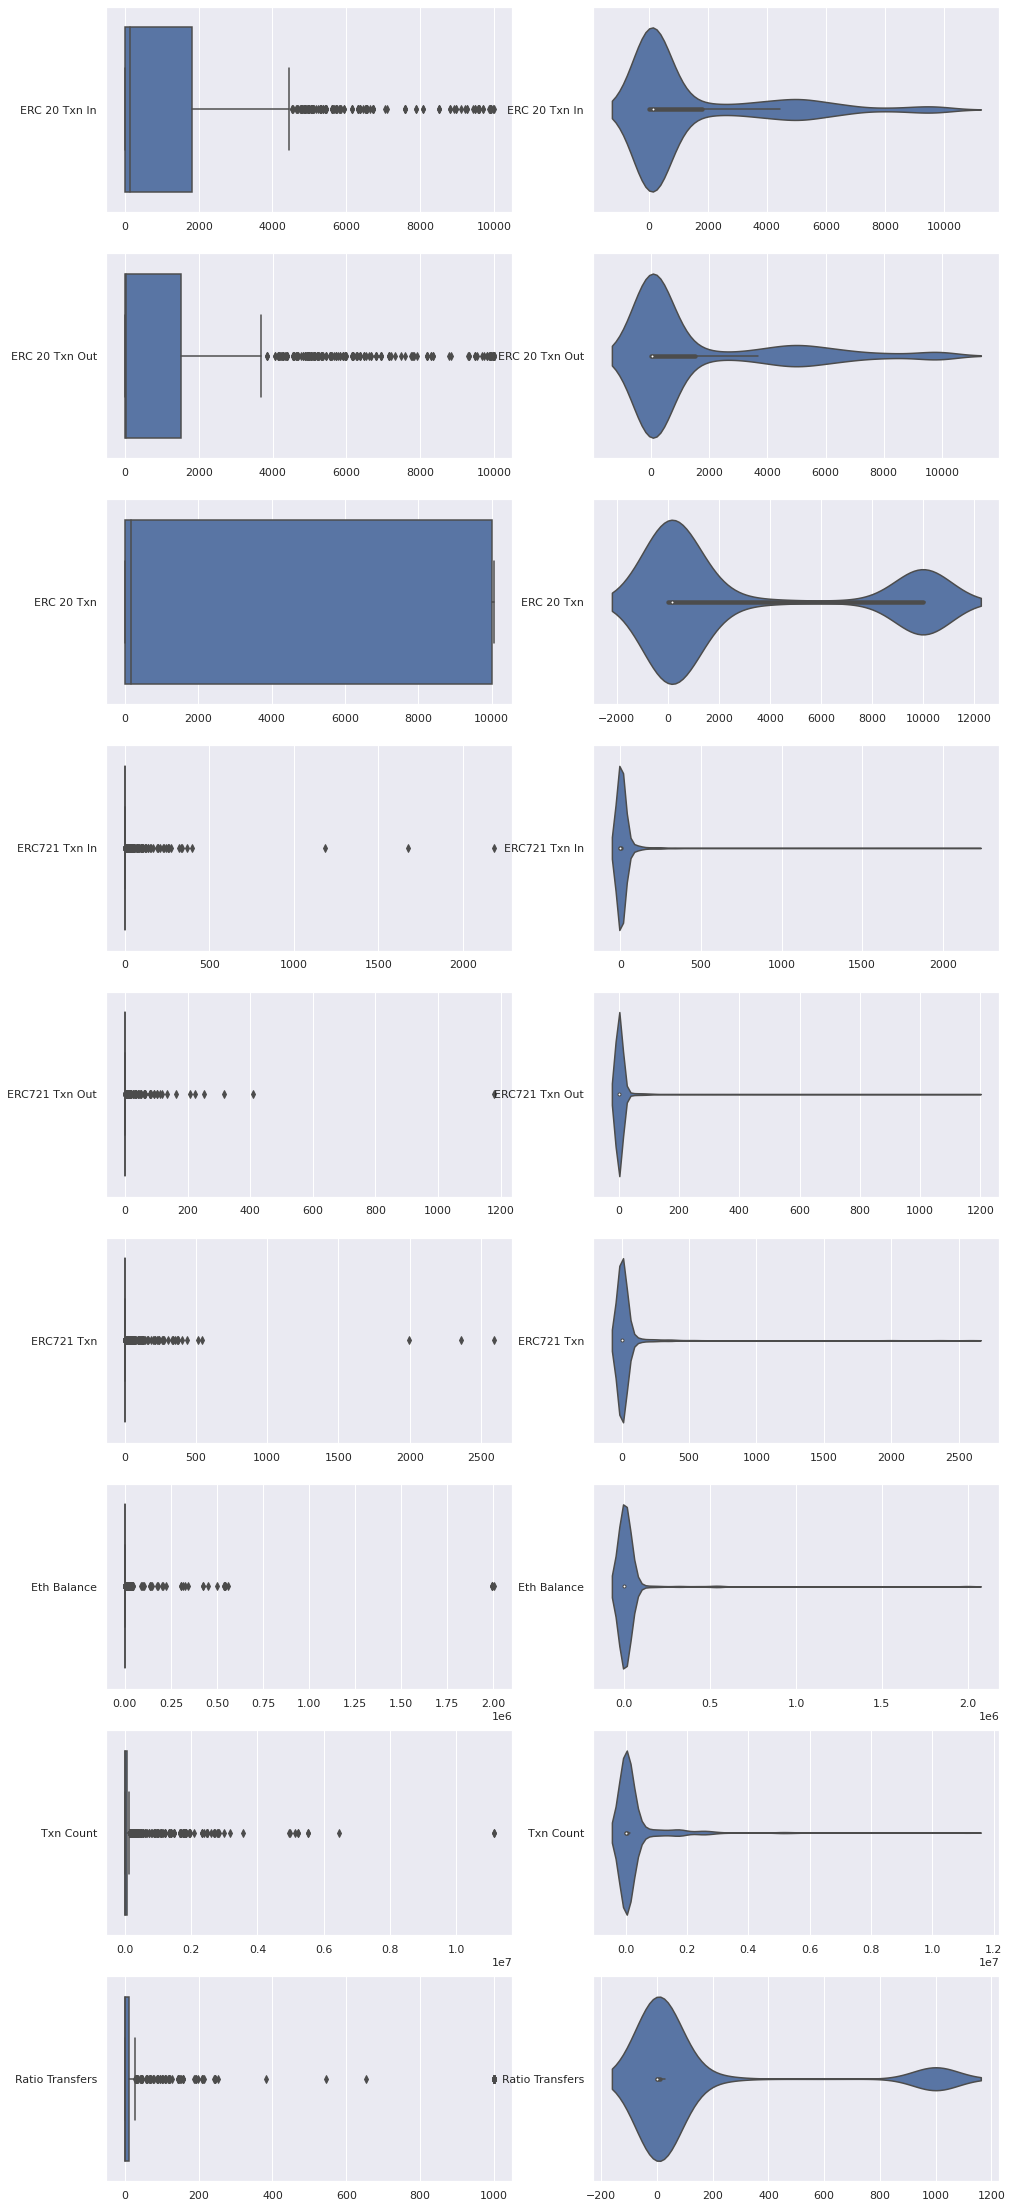

In [ ]:
# Check the distribution
variables = ["ERC 20 Txn In", "ERC 20 Txn Out", "ERC 20 Txn","ERC721 Txn In", "ERC721 Txn Out", "ERC721 Txn", "Eth Balance","Txn Count", "Ratio Transfers"]
f, axes = plt.subplots(9, 2, figsize=(16, 40))
j = 0
for i in variables:
    sb.boxplot(data = pd.DataFrame(df_final[i]), orient = "h", ax = axes[j,0])
    # sb.histplot(data = pd.DataFrame(df[i]), ax = axes[j, 1])
    sb.violinplot(data = pd.DataFrame(df_final[i]), orient = "h", ax = axes[j,1])
    j+=1

### Check boxplot with exchange 

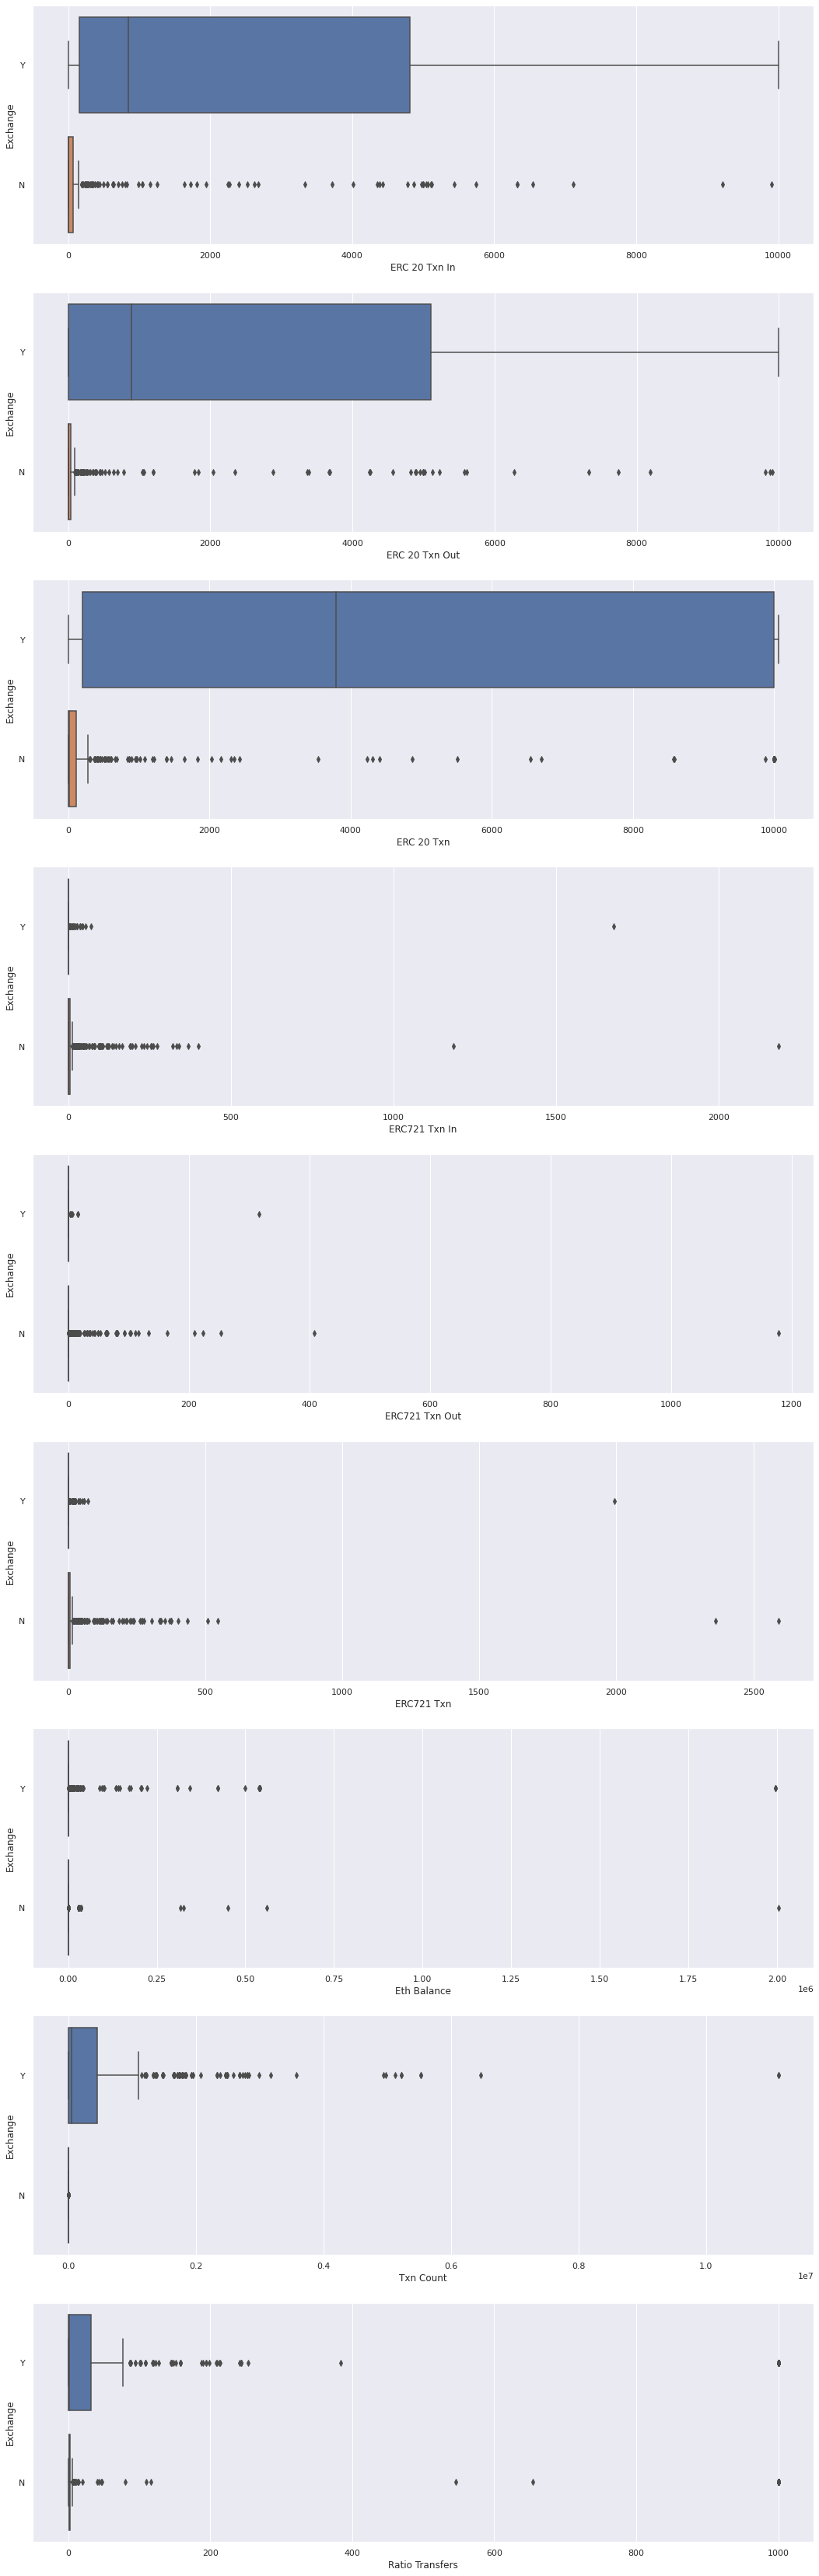

In [ ]:
# concat DFs
exchange = pd.DataFrame(df_final["Exchange"])
# box plot
f, axes = plt.subplots(9, 1, figsize=(18, 60))
j = 0
for i in variables:
    totalConcat = pd.concat([pd.DataFrame(df_final[i]), exchange], axis=1).reindex(pd.DataFrame(df_final[i]).index)
    sb.boxplot(x = i, y = "Exchange", data = totalConcat, orient = "h", ax = axes[j])
    j+=1

## Violin plot against exchange

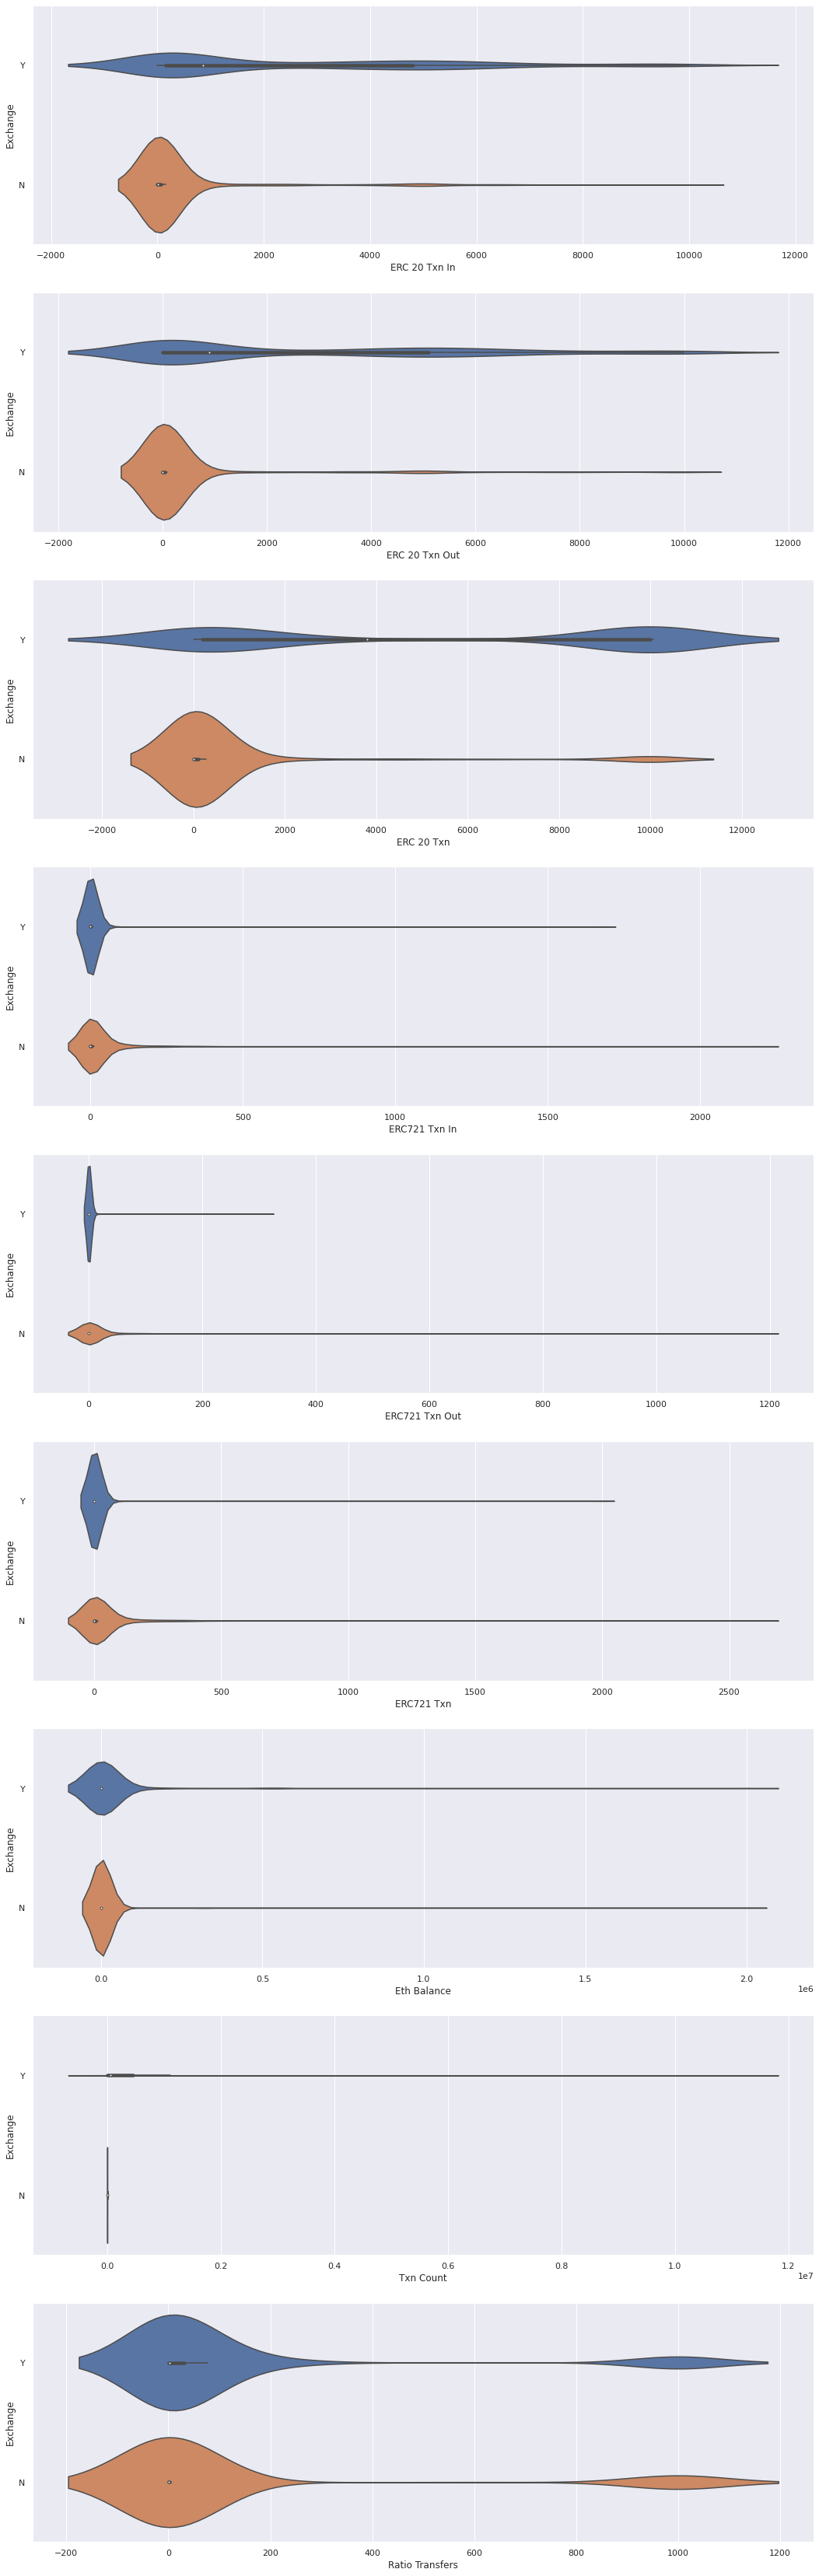

In [ ]:
# concat DFs
exchange = pd.DataFrame(df_final["Exchange"])
# box plot
f, axes = plt.subplots(9, 1, figsize=(18, 60))
j = 0
for i in variables:
    totalConcat = pd.concat([pd.DataFrame(df_final[i]), exchange], axis=1).reindex(pd.DataFrame(df_final[i]).index)
    sb.violinplot(x = i, y = "Exchange", data = totalConcat, orient = "h", ax = axes[j])
    j+=1

## Strip Plot Against EDA

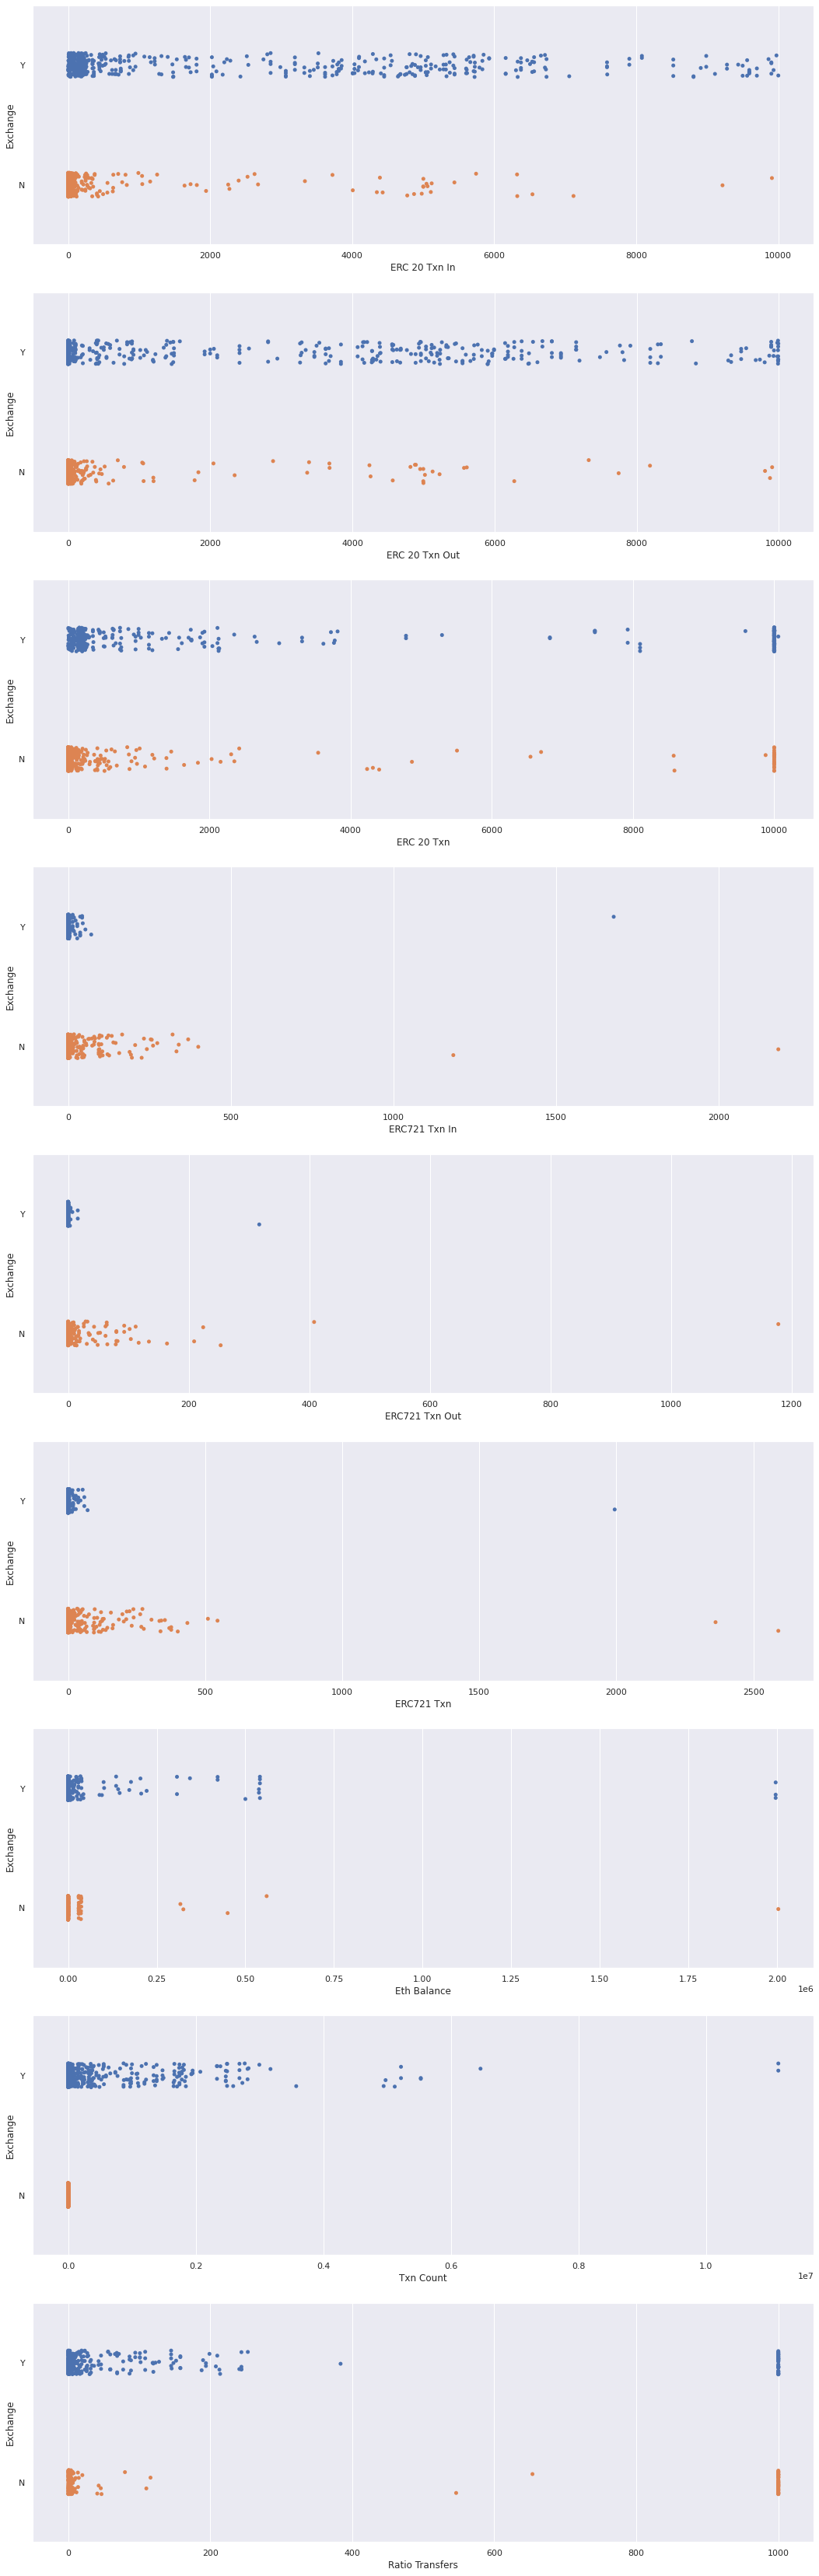

In [ ]:
# concat DFs
exchange = pd.DataFrame(df_final["Exchange"])
# box plot
f, axes = plt.subplots(9, 1, figsize=(18, 60))
j = 0
for i in variables:
    totalConcat = pd.concat([pd.DataFrame(df_final[i]), exchange], axis=1).reindex(pd.DataFrame(df_final[i]).index)
    sb.stripplot(x = i, y = "Exchange", data = totalConcat, orient = "h", ax = axes[j])
    j+=1

## Data Split

In [ ]:
def splitData(pred, response):
    predTrain, predTest, responseTrain, responseTest = train_test_split(pred, response, test_size=0.2, random_state=42)
    return predTrain, predTest, responseTrain, responseTest

## Variables for splitting

In [ ]:
treevariables = ["Txn Count", 'ERC 20 Txn', 'ERC 20 Txn In', 'ERC 20 Txn Out', 'Ratio Transfers']
forestvariables = ["Txn Count", 'ERC 20 Txn', 'ERC 20 Txn In', 'ERC 20 Txn Out', 'Ratio Transfers']
knnvariables = ["Txn Count", 'ERC 20 Txn', 'ERC 20 Txn In', 'ERC 20 Txn Out']

## Run loop to decide optimal combination of features to run models on

insert loop here from checkyesjuilet, run for TRAIN SET 

## Use GridSearch to determine optimal parameters for each Model

## Decision Tree

Function to generate Decision Tree of Depth x

In [ ]:
# input x and y train and test data set, depth of decision tree, and feature name of attribute
def classify(x_train, x_test, y_train, y_test, depth): 

    dectree1 = DecisionTreeClassifier(max_depth = depth)
    dectree1.fit(x_train, y_train)

    # Predict y values corresponding to x
    y_train_pred1 = dectree1.predict(x_train)
    y_test_pred1 = dectree1.predict(x_test)

    # Confusion Matrix
    CM_train1 = confusion_matrix(y_train, y_train_pred1)
    CM_test1 = confusion_matrix(y_test, y_test_pred1)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree1.score(x_train, y_train))
    print("True Positive Rate \t:", CM_train1[1][1] / (CM_train1[1][1]+CM_train1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_train1[0][0] / (CM_train1[0][0]+CM_train1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_train1[0][1] / (CM_train1[0][0]+CM_train1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_train1[1][0] / (CM_train1[1][1]+CM_train1[1][0])) # FN/(TP+FN)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree1.score(x_test, y_test))
    print("True Positive Rate \t:", CM_test1[1][1] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_test1[0][0] / (CM_test1[0][0]+CM_test1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_test1[0][1] / (CM_test1[0][0]+CM_test1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_test1[1][0] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred1),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    # Plot the trained Decision Tree
    f = plt.figure(figsize=(12,12))
    plot_tree(dectree1, filled=True, rounded=True, 
            feature_names=x_train.columns, 
            # False, then True
            class_names=["N","Y"])

    return dectree1

#### Split data set for Decision Tree

`OneHotEncoding` is done for the splitting of dataset to conduct multi-variate Classification Tree with all 5 predictors.

In [ ]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
df_cat = df_final[treevariables]
ohe.fit(df_cat)
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(df_cat.columns))

# Check the encoded variables
df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Columns: 1717 entries, Txn Count_0.0 to Ratio Transfers_1000.0
dtypes: float64(1717)
memory usage: 12.5 MB


In [ ]:
# split data
xtrain_tree, xtest_tree, ytrain_tree, ytest_tree = splitData(pd.DataFrame(df_cat_ohe), pd.DataFrame(df_final['Exchange']))
print("Train Set :", xtrain_tree.shape, ytrain_tree.shape)
print("Test Set  :", xtest_tree.shape, ytest_tree.shape)

Train Set : (761, 1717) (761, 1)
Test Set  : (191, 1717) (191, 1)


### GridSearch for Optimal maxDepth (Decision Tree)

In [ ]:
#new DT
newDT = DecisionTreeClassifier()
better_variables = ["ERC 20 Txn In", "ERC 20 Txn Out", "ERC 20 Txn", "Txn Count", "Ratio Transfers"]
#params to test
params = {"max_depth": np.arange(1, 25)}
#test all params
DTGrid = GridSearchCV(newDT, params)
DTGrid.fit(xtrain_tree, ytrain_tree)

DTGrid.best_params_

{'max_depth': 22}

Optimal max depth is 22

## Random Forest

In [ ]:
def rf(predTrain, predTest, responseTrain, responseTest, n, depth):
    # predTrain, predTest, responseTrain, responseTest = train_test_split(pred, response, test_size=0.2, random_state=42)
    rforest = RandomForestClassifier(n_estimators=n, max_depth=depth)
    rforest.fit(predTrain, responseTrain.values.ravel())


    yTrainPred = rforest.predict(predTrain)
    yTestPred = rforest.predict(predTest)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", rforest.score(predTrain, responseTrain))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", rforest.score(predTest, responseTest))
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(responseTrain, yTrainPred),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(responseTest, yTestPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Split Data for Random Forest

In [ ]:
xtrain, xtest, ytrain, ytest = splitData(pd.DataFrame(df_final[forestvariables]),pd.DataFrame(df_final["Exchange"]))
print("Train Set :", xtrain.shape, ytrain.shape)
print("Test Set  :", xtest.shape, ytest.shape)

### GridSearch for Optimal maxDepth & n



In [ ]:
#new RF model
newRF = RandomForestClassifier()

#params to test
params = {"n_estimators": np.arange(100, 1000, 100), "max_depth": np.arange(3,20)}

#test all params
rfGrid = GridSearchCV(newRF, params)

rfGrid.fit(xtrain, ytrain)


rfGrid.best_params_

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680:

  estimator.fit(X_train, y_train, **fit_params)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/shared-libs/python3.7/py/lib/python3.7/site-pack

{'max_depth': 7, 'n_estimators': 300}

## KNN

In [ ]:
def splitData(a1, a2):
    xTrain, xTest, yTrain, yTest = train_test_split(a1, a2, test_size=0.2, random_state = 42)
    return [xTrain, xTest, yTrain, yTest]
    
def knn(x_train, x_test, y_train, y_test, n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    # Predict y values corresponding to x
    y_train_pred1 = knn.predict(x_train)
    y_test_pred1 = knn.predict(x_test)

    # Confusion Matrix
    CM_train1 = confusion_matrix(y_train, y_train_pred1)
    CM_test1 = confusion_matrix(y_test, y_test_pred1)
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", knn.score(x_train, y_train))
    print("True Positive Rate \t:", CM_train1[1][1] / (CM_train1[1][1]+CM_train1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_train1[0][0] / (CM_train1[0][0]+CM_train1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_train1[0][1] / (CM_train1[0][0]+CM_train1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_train1[1][0] / (CM_train1[1][1]+CM_train1[1][0])) # FN/(TP+FN)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", knn.score(x_test, y_test))
    print("True Positive Rate \t:", CM_test1[1][1] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_test1[0][0] / (CM_test1[0][0]+CM_test1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_test1[0][1] / (CM_test1[0][0]+CM_test1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_test1[1][0] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred1),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    return knn

## Split Data for KNN

In [ ]:
xtrain_knn, xtest_knn, ytrain_knn, ytest_knn = splitData(pd.DataFrame(df_final[knnvariables]),pd.DataFrame(df_final["Exchange"]))

### GridSearch for Optimal k

In [ ]:
#new KNN
newKNN = KNeighborsClassifier()

#params to test
params = {"n_neighbors": np.arange(3, 15), "weights" : ["uniform", "distance"]}

KNN_Variables = ["ERC 20 Txn In", "ERC 20 Txn Out", "ERC 20 Txn", "Txn Count"]

#test all params
KNNGrid = GridSearchCV(newKNN, param_grid = params, scoring="accuracy", cv = 10)

KNNGrid.fit(pd.DataFrame(df_final[KNN_Variables]), exchange)

KNNGrid.best_params_

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expe

{'n_neighbors': 11, 'weights': 'distance'}

## Running All 3 Models with Tuned Parameters
Using the optimal parameters from GridSearch, and the optimal combination of predictors identified from our for loop.

### Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8449408672798949
True Positive Rate 	: 0.699228791773779
True Negative Rate 	: 0.9973118279569892
False Positive Rate 	: 0.002688172043010753
False Negative Rate 	: 0.30077120822622105

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8167539267015707
True Positive Rate 	: 0.6781609195402298
True Negative Rate 	: 0.9326923076923077
False Positive Rate 	: 0.0673076923076923
False Negative Rate 	: 0.3218390804597701



DecisionTreeClassifier(max_depth=22)

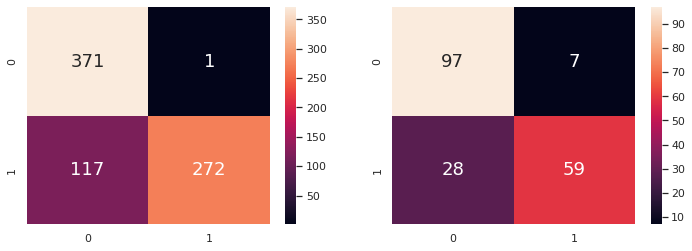

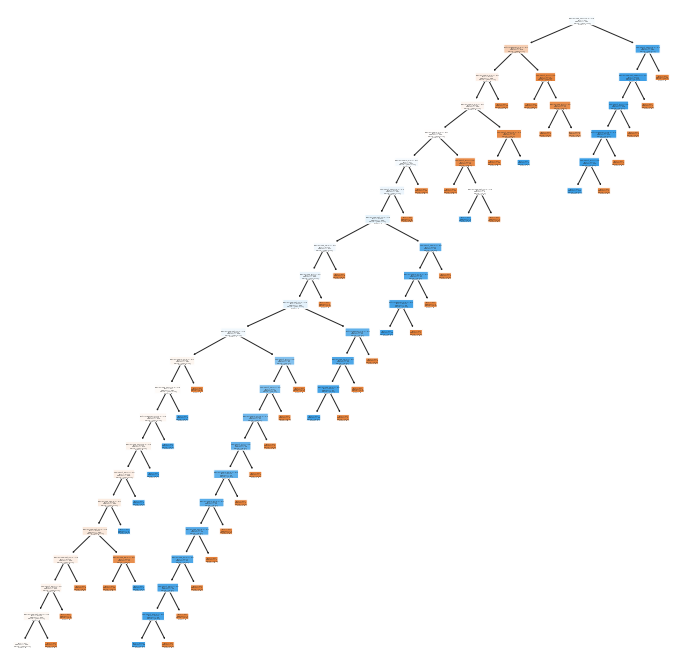

In [ ]:
classify(xtrain_tree, xtest_tree, ytrain_tree, ytest_tree, 22)

### Random Forest

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9789750328515112

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9214659685863874



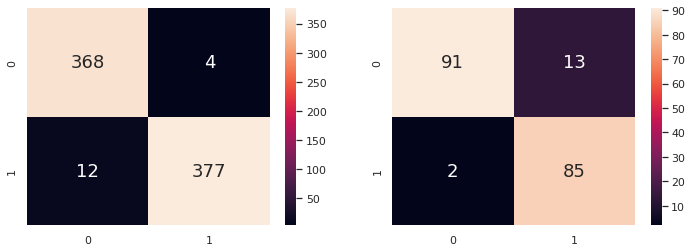

In [ ]:
rf(xtrain, xtest, ytrain, ytest, 300, 7)

### K Nearest Neighbours

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9080157687253614
True Positive Rate 	: 0.8766066838046273
True Negative Rate 	: 0.9408602150537635
False Positive Rate 	: 0.05913978494623656
False Negative Rate 	: 0.12339331619537275

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8586387434554974
True Positive Rate 	: 0.8390804597701149
True Negative Rate 	: 0.875
False Positive Rate 	: 0.125
False Negative Rate 	: 0.16091954022988506



KNeighborsClassifier(n_neighbors=11)

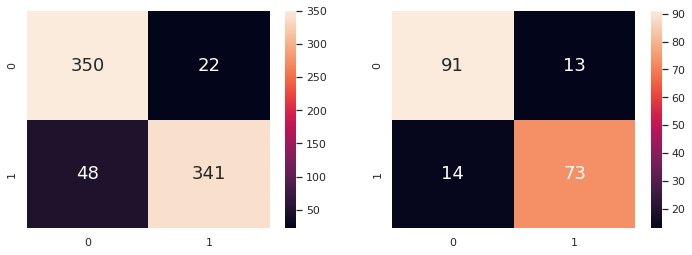

In [ ]:
knn(xtrain_knn, xtest_knn, ytrain_knn, ytest_knn, 11)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=696215f1-387b-461d-aa4c-0ccf546cb4fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>